# Your Future App

## 1- Import Packages

In [ ]:
# munging imports
import pandas as pd
import numpy as np

# visualization imports
import matplotlib.pyplot as plt
import seaborn as sns

# modeling imports
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
from statistics import mean
from sklearn.datasets import make_classification
from sklearn.pipeline import make_pipeline
import math
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor


sklearn.linear_model._base.LinearRegression

## 2- Read the dataset

In [ ]:
df = pd.read_csv('Google-Playstore.csv')

you have to specify the correct path to the dataset

In [ ]:
df.head()

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Currency,Size,Minimum Android,Developer Id,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10+,10.0,15,True,0.0,USD,10M,7.1 and up,Jean Confident Irénée NIYIZIBYOSE,https://beniyizibyose.tk/#/,jean21101999@gmail.com,"Feb 26, 2020","Feb 26, 2020",Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,USD,2.9M,5.0 and up,Webserveis,https://webserveis.netlify.app/,webserveis@gmail.com,"May 21, 2020","May 06, 2021",Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50+,50.0,58,True,0.0,USD,3.7M,4.0.3 and up,Cabin Crew,NaN,vnacrewit@gmail.com,"Aug 9, 2019","Aug 19, 2019",Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False,2021-06-15 20:19:35
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10+,10.0,19,True,0.0,USD,1.8M,4.0.3 and up,Climate Smart Tech2,http://www.climatesmarttech.com/,climatesmarttech2@gmail.com,"Sep 10, 2018","Oct 13, 2018",Everyone,NaN,True,False,False,2021-06-15 20:19:35
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100+,100.0,478,True,0.0,USD,6.2M,4.1 and up,Rafal Milek-Horodyski,http://www.horodyski.com.pl,rmilekhorodyski@gmail.com,"Feb 21, 2020","Nov 12, 2018",Everyone,http://www.horodyski.com.pl,False,False,False,2021-06-15 20:19:35


The first 5 rows in the dataset

## 3- EDA

In [ ]:
df.shape

(2312944, 24)

The dataset contains 2312944 instances and 24 features 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312944 entries, 0 to 2312943
Data columns (total 24 columns):
 #   Column             Dtype  
---  ------             -----  
 0   App Name           object 
 1   App Id             object 
 2   Category           object 
 3   Rating             float64
 4   Rating Count       float64
 5   Installs           object 
 6   Minimum Installs   float64
 7   Maximum Installs   int64  
 8   Free               bool   
 9   Price              float64
 10  Currency           object 
 11  Size               object 
 12  Minimum Android    object 
 13  Developer Id       object 
 14  Developer Website  object 
 15  Developer Email    object 
 16  Released           object 
 17  Last Updated       object 
 18  Content Rating     object 
 19  Privacy Policy     object 
 20  Ad Supported       bool   
 21  In App Purchases   bool   
 22  Editors Choice     bool   
 23  Scraped Time       object 
dtypes: bool(4), float64(4), int64(1), object(15)
memor

the features have diffrent types : object, float, int and bool.

In [ ]:
df.describe()

,Rating,Rating Count,Minimum Installs,Maximum Installs,Price
count,2.290061e+06,2.290061e+06,2.312837e+06,2.312944e+06,2.312944e+06
mean,2.203152e+00,2.864839e+03,1.834452e+05,3.202017e+05,1.034992e-01
std,2.106223e+00,2.121626e+05,1.513144e+07,2.355495e+07,2.633127e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,5.000000e+01,8.400000e+01,0.000000e+00
50%,2.900000e+00,6.000000e+00,5.000000e+02,6.950000e+02,0.000000e+00
75%,4.300000e+00,4.200000e+01,5.000000e+03,7.354000e+03,0.000000e+00
max,5.000000e+00,1.385576e+08,1.000000e+10,1.205763e+10,4.000000e+02


By describe method we can have the statistics of each numeric feature. 

In [ ]:
df.isna().sum()

App Name                  2
App Id                    0
Category                  0
Rating                22883
Rating Count          22883
Installs                107
Minimum Installs        107
Maximum Installs          0
Free                      0
Price                     0
Currency                135
Size                    196
Minimum Android        6530
Developer Id             33
Developer Website    760835
Developer Email          31
Released              71053
Last Updated              0
Content Rating            0
Privacy Policy       420953
Ad Supported              0
In App Purchases          0
Editors Choice            0
Scraped Time              0
dtype: int64

By using isna().sum() we can know the null values for each column (feature).

In [ ]:
df_dropna=df.dropna()
df_dropna.shape

(1287191, 24)

By using dropna() function we loss 1 milion row ... 

## Which category has more Apps?

In [ ]:
df['Category'].value_counts()

Education                  241090
Music & Audio              154906
Tools                      143988
Business                   143771
Entertainment              138276
Lifestyle                  118331
Books & Reference          116728
Personalization             89210
Health & Fitness            83510
Productivity                79698
Shopping                    75256
Food & Drink                73927
Travel & Local              67288
Finance                     65466
Arcade                      53792
Puzzle                      51168
Casual                      50813
Communication               48167
Sports                      47483
Social                      44734
News & Magazines            42807
Photography                 35552
Medical                     32065
Action                      27555
Maps & Navigation           26722
Simulation                  23282
Adventure                   23203
Educational                 21308
Art & Design                18539
Auto & Vehicle

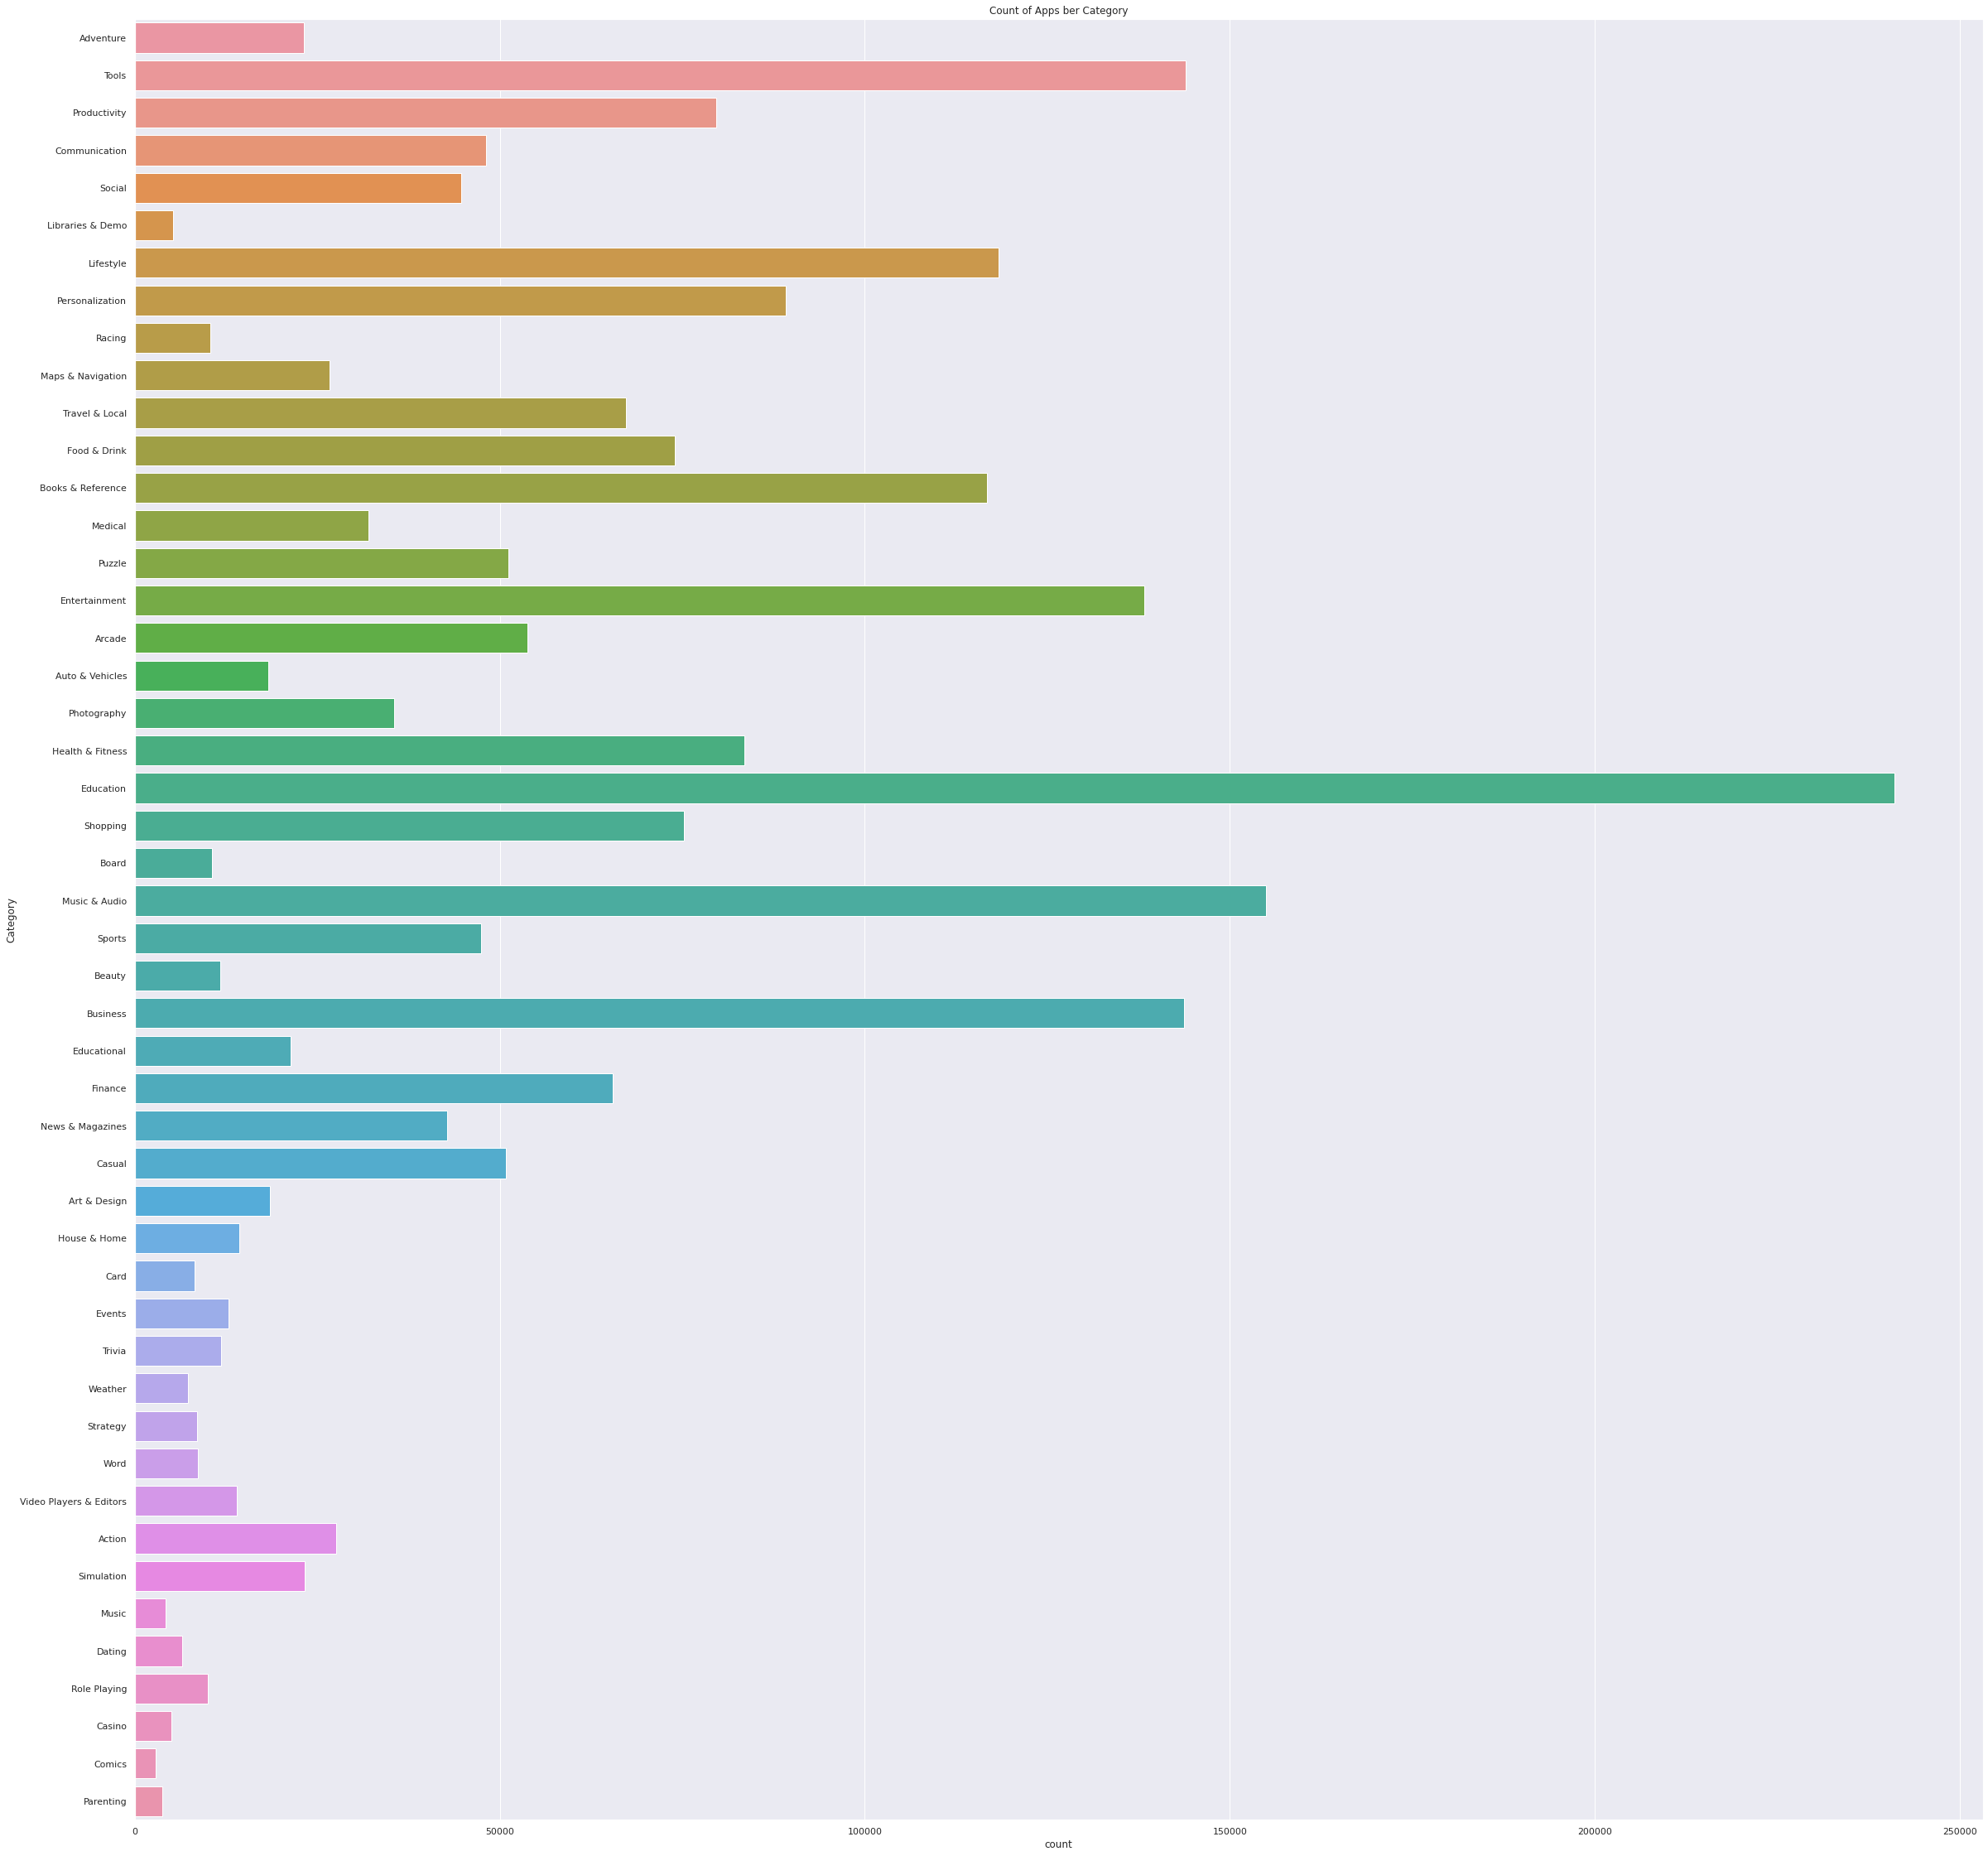

In [ ]:
plt.figure(figsize=(40,40))
sns.set_theme(style="darkgrid")
ax = sns.countplot(y=df['Category']);
plt.title("Count of Apps ber Category")

    
plt.show()

By applying value_counts() function and using countplot we can see the most Apps belongs to "Education" category followed by "Music & Audio" and "Comics" has the least Apps. The following graph will clarify that. 

### Boxplot of numeric variables:

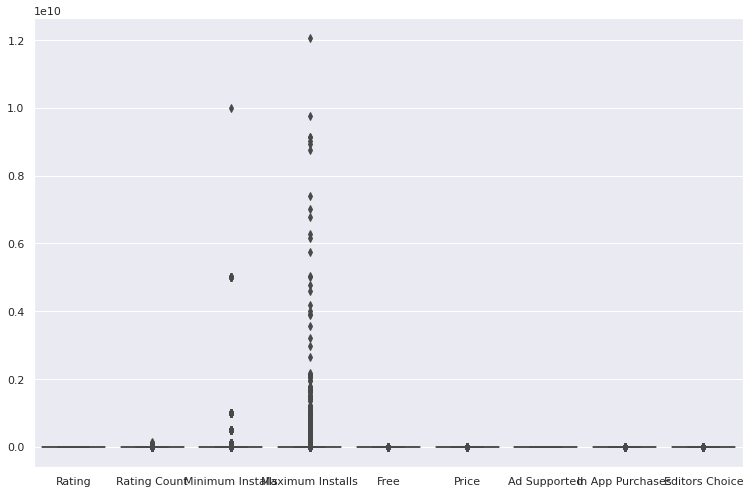

In [ ]:
fig, ax = plt.subplots()

fig.set_size_inches(12.7, 8.27)
sns.boxplot(data=df, ax=ax)    

We can notice from the boxplot graph that the Maximum Installs feature has huge difference between the data entries. 

In [ ]:
df['Installs'].value_counts()

100+               443368
1,000+             398199
10+                300156
10,000+            256723
500+               189077
50+                170465
5,000+             143593
100,000+           110257
50,000+             75359
5+                  73772
1+                  65345
1,000,000+          33650
500,000+            27012
0+                  11566
5,000,000+           6595
10,000,000+          6192
50,000,000+           824
100,000,000+          549
500,000,000+           65
1,000,000,000+         55
5,000,000,000+         14
10,000,000,000+         1
Name: Installs, dtype: int64

By applying value_counts() on Installs feature we can notice that 443368 Apps have downloaded +100 times (100-500), while only one App have donloaded +10000000000 times

In [ ]:
df["Installs"]=df["Installs"].replace({"100+":"Too Low Installed",
                                       "1,000+":"Too Low Installed",
                                       "10+":"Too Low Installed",
                                       "500+":"Too Low Installed",
                                       "50+":"Too Low Installed",
                                       "5+":"Too Low Installed",
                                       "1+":"Too Low Installed",
                                       "0+":"Too Low Installed",
                                       "10,000+":"Low Installed",
                                       "5,000+":"Low Installed",
                                       "100,000+":"Low Installed",
                                       "50,000+":"Low Installed",
                                       "1,000,000+":"Medium Installed",
                                       "500,000+":"Medium Installed",
                                       "5,000,000+":"Highly Installed",
                                       "10,000,000+":"Highly Installed",
                                       "50,000,000+":"Highly Installed",
                                       "100,000,000+":"Highly Installed",
                                       "500,000,000+":"Too Highly Installed",
                                       "1,000,000,000+":"Too Highly Installed",
                                       "5,000,000,000+":"Too Highly Installed",
                                       "10,000,000,000+":"Too Highly Installed"
                                       })


In [ ]:
df['Installs'].value_counts()

Too Low Installed       1651948
Low Installed            585932
Medium Installed          60662
Highly Installed          14160
Too Highly Installed        135
Name: Installs, dtype: int64

To make Installs class more efficient I have reclassifying the labels to 5 labels: *Too Low Installed*, *Low Installed*,*Medium Installed*,*Highly Installed*, and *Too Highly Installed*.

## To which Installs label the maximum installs Apps belongs?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


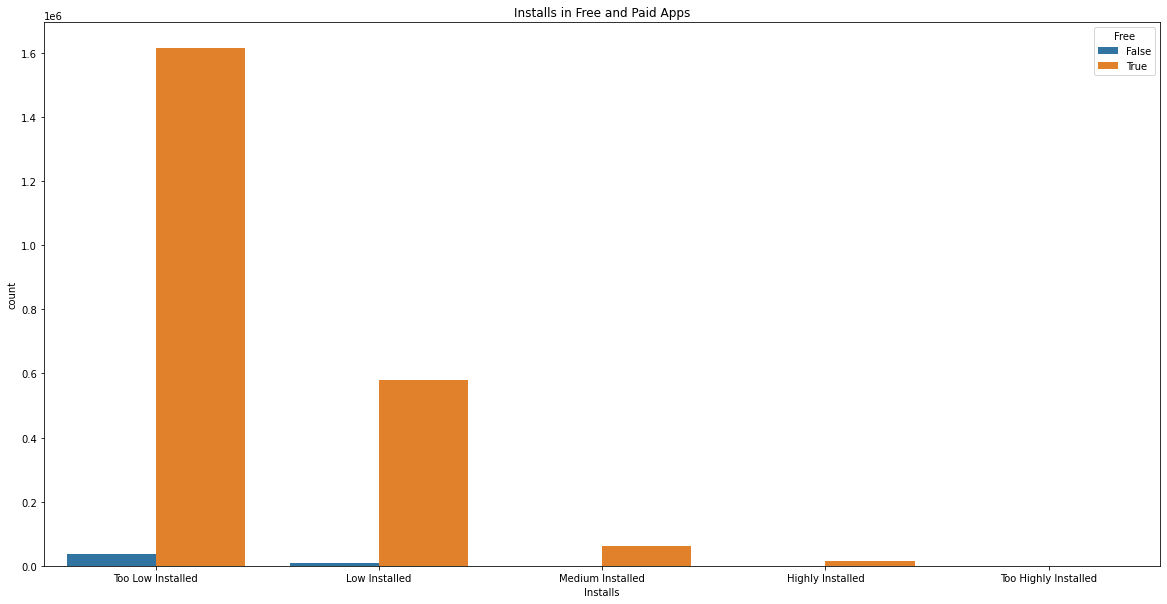

In [ ]:
#Add xlabel ("x 6m")
plt.figure(figsize=(20,10))
ax = sns.countplot(df['Installs'],hue=df["Free"]);
plt.title("Installs in Free and Paid Apps")
    
plt.show()

From the graph we can notice that the "Too Low Installed" Installs has the maximum count of App Free because people will not download 2m App!. Also, the paid App has the highest count in the "Too Low Installed" Installs and we can say this because not all people will pay for App..

## Who is the developer who has the maximum number of Apps?

In [ ]:
df['Developer Id'].value_counts()

Subsplash Inc                           5422
TRAINERIZE                              5153
ChowNow                                 4865
OrderYOYO                               2884
Phorest                                 2821
                                        ... 
CoeliacMap.com                             1
GoingPublic Media AG                       1
Aldridge Traffic Controllers Pty Ltd       1
Paolo Manuelli                             1
Corner News 24                             1
Name: Developer Id, Length: 758371, dtype: int64

By applying value_counts() function on "Developer Id" we can notice that "Subsplash Inc" has the highest number of puplished Apps by 5422 Apps on Google Store 

In [ ]:
df[df['Developer Id']=='Subsplash Inc'].Category.value_counts()

Lifestyle            3043
Education            2363
Libraries & Demo        6
Music & Audio           2
Finance                 2
Books & Reference       1
Beauty                  1
Business                1
Educational             1
Tools                   1
Health & Fitness        1
Name: Category, dtype: int64

"Subsplash Inc" develops more Apps in the "Lifestyle" category

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


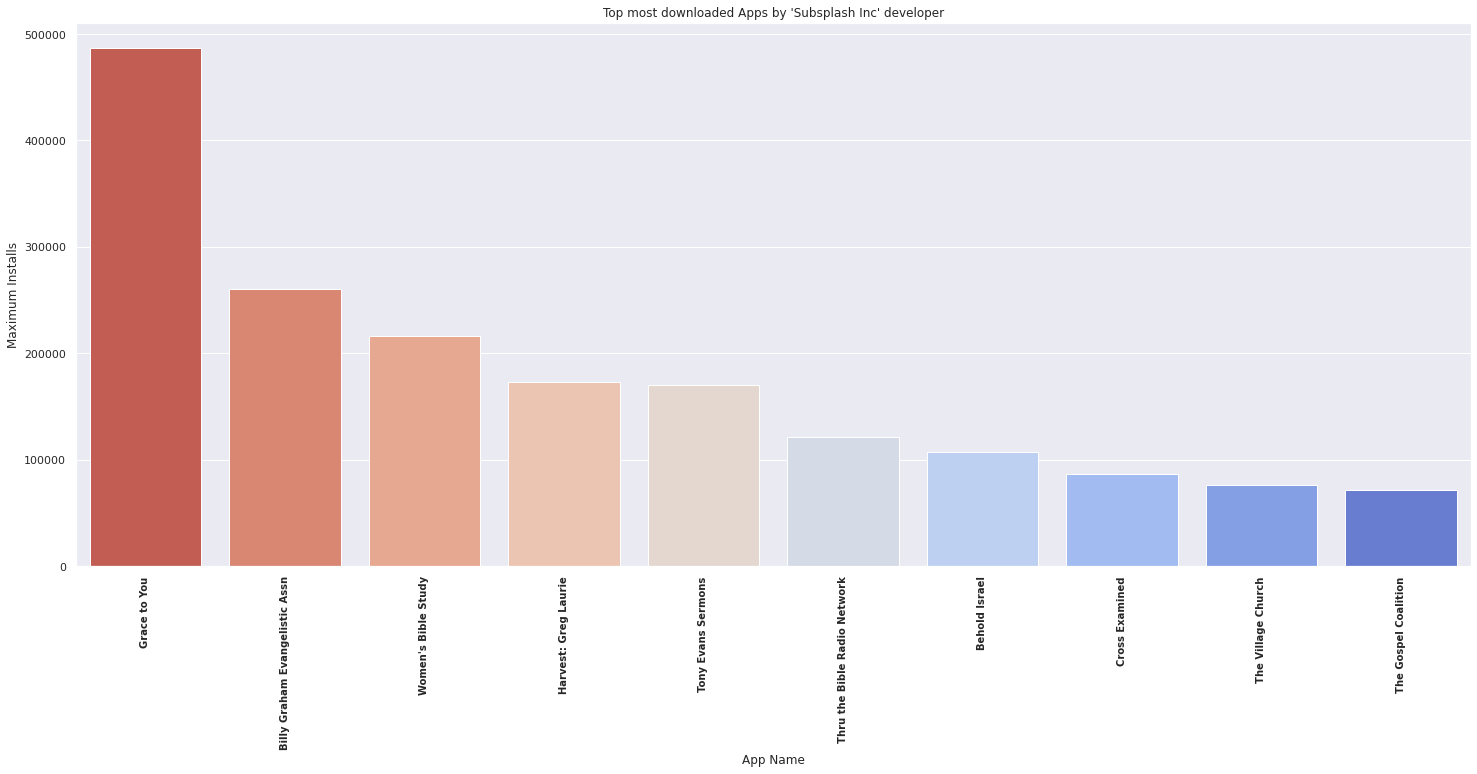

In [ ]:
df_maximumApp = df.loc[df['Developer Id']=='Subsplash Inc']
df_maximumApp = df_maximumApp.sort_values(by=['Maximum Installs'],ascending=False).head(10)
plt.figure(figsize=(25,10))
ax = sns.barplot(df_maximumApp["App Name"], df_maximumApp['Maximum Installs'],palette='coolwarm_r')
plt.title("Top most downloaded Apps by 'Subsplash Inc' developer")
plt.xticks(fontsize=10,fontweight='bold',rotation=90);
plt.show()

The Top 10 Apps due number of installs developed by "Subsplash Inc"

What is 'Grace to You' App ? 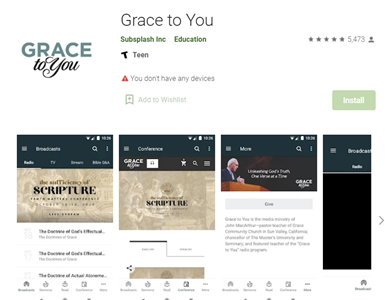

In [ ]:
df.loc[df['App Name']=='Grace to You']

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Currency,Size,Minimum Android,Developer Id,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
2166968,Grace to You,com.subsplash.thechurchapp.gracetoyou,Education,4.9,5367.0,Low Installed,100000.0,486408,True,0.0,USD,21M,4.4 and up,Subsplash Inc,http://www.subsplash.com/,appsupport@subsplash.com,"Jan 12, 2011","May 14, 2020",Teen,http://www.subsplash.com/legal/privacy,False,False,False,2021-06-16 10:51:45


In [ ]:
df['Rating'].value_counts()

0.0    1059762
5.0     100122
4.2      87993
4.4      86304
4.3      83276
4.6      78302
4.5      76753
4.1      69723
4.0      67342
4.7      62205
4.8      61109
3.9      55684
3.8      53863
4.9      44524
3.7      43300
3.6      35989
3.5      31636
3.4      28908
3.3      22613
3.2      21485
3.0      17275
3.1      15539
2.8      12235
2.9      11522
2.6       9213
2.7       9200
2.5       6942
2.4       6051
2.3       5414
2.2       4954
2.0       3804
2.1       3675
1.8       2957
1.9       2588
1.7       1928
1.6       1644
1.5       1157
1.4       1011
1.0        713
1.3        579
1.2        531
1.1        236
Name: Rating, dtype: int64

most Apps rating is 0, and this is because not all people rating the Apps, unfortunately I am one of them ..

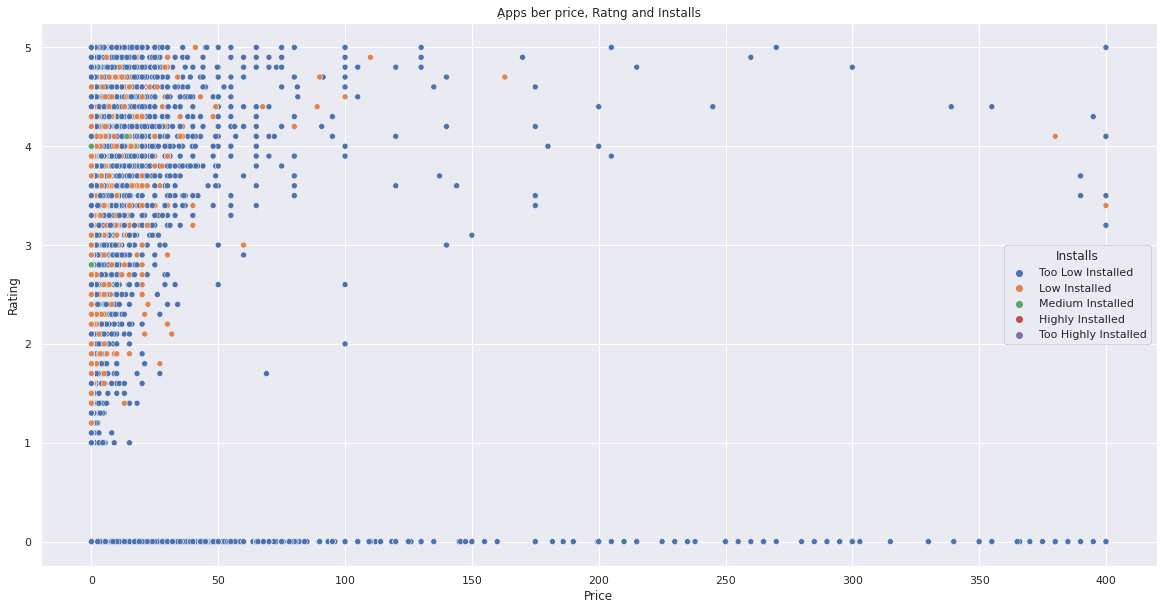

In [ ]:
plt.figure(figsize=(20,10))
ax = sns.scatterplot(y=df['Rating'],x=df["Price"],hue=df['Installs']);
plt.title("ِApps ber price, Ratng and Installs")


    
plt.show()

From this scatterplot we can notice most of Apps that have higher price have high rate (3 and above), and most of then belongs to "Too Low Installed" Installs

## Will the price affect number of installations?

In [ ]:
df.groupby('Price')['Maximum Installs'].sum().sort_values()

##draw here 
##discover who is the most downloaded app when it is not free
##add static method to show and profe the diff between free and not free app (739123155435)
dfFree=df[df['Price']==0]    
print("total number of installs when it is free: ",dfFree['Maximum Installs'].sum()) 

dfFree=df[df['Price']!=0]    
print("total number of installs when it is not free: ", dfFree['Maximum Installs'].sum())

total number of installs when it is free:  739865893313
total number of installs when it is not free:  742737878


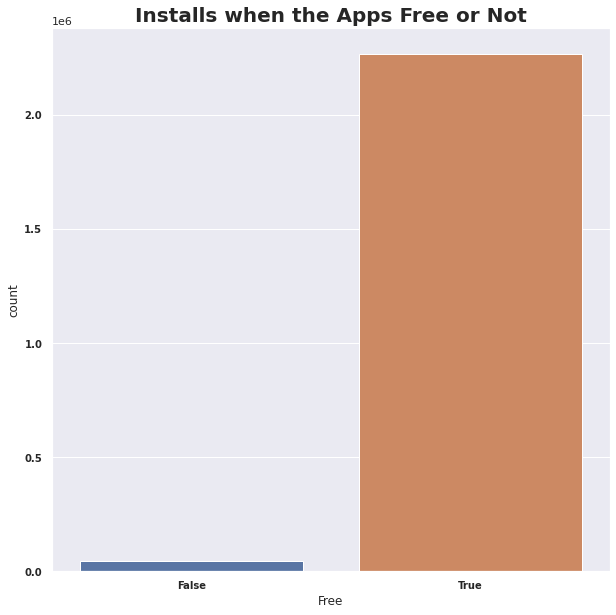

In [ ]:
plt.figure(figsize=(10,10))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x=df['Free']);
plt.title("Installs when the Apps Free or Paid",fontsize=20,fontweight='bold')
plt.xticks(fontsize=10,fontweight='bold');
plt.yticks(fontsize=10,fontweight='bold');

    
plt.show()

From this information we can say the number of installs when the app free is clearly higher than when it has price.

## What is the most downloaded app, why?

In [ ]:
df.loc[df['Maximum Installs']==df['Maximum Installs'].max()]

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Currency,Size,Minimum Android,Developer Id,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
2155096,Google Play services,com.google.android.gms,Tools,4.2,35128398.0,Too Highly Installed,1.000000e+10,12057627016,True,0.0,USD,Varies with device,Varies with device,Google LLC,https://developers.google.com/android/google-p...,apps-help@google.com,"May 24, 2012","Jun 10, 2021",Everyone,http://www.google.com/policies/privacy,False,False,False,2021-06-16 10:41:26


"Google Play services" is the most downloaded app. And that because it is used to update Google apps and apps from Google Play. 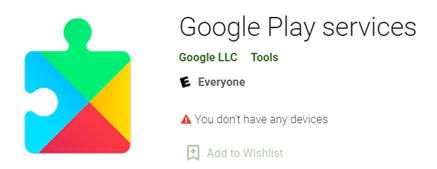

## What is the most famous category of the app?

In [ ]:

df_draft=(df.groupby('Category')['Maximum Installs'].sum()).to_frame()
df_draft

df_draft.loc[df_draft['Maximum Installs']==sorted(df_draft['Maximum Installs'])[-1]]


,Maximum Installs
Category,
Tools,119849500546


In [ ]:
df_draft.loc[df_draft['Maximum Installs']==sorted(df_draft['Maximum Installs'])[-2]]

,Maximum Installs
Category,
Communication,72306404399


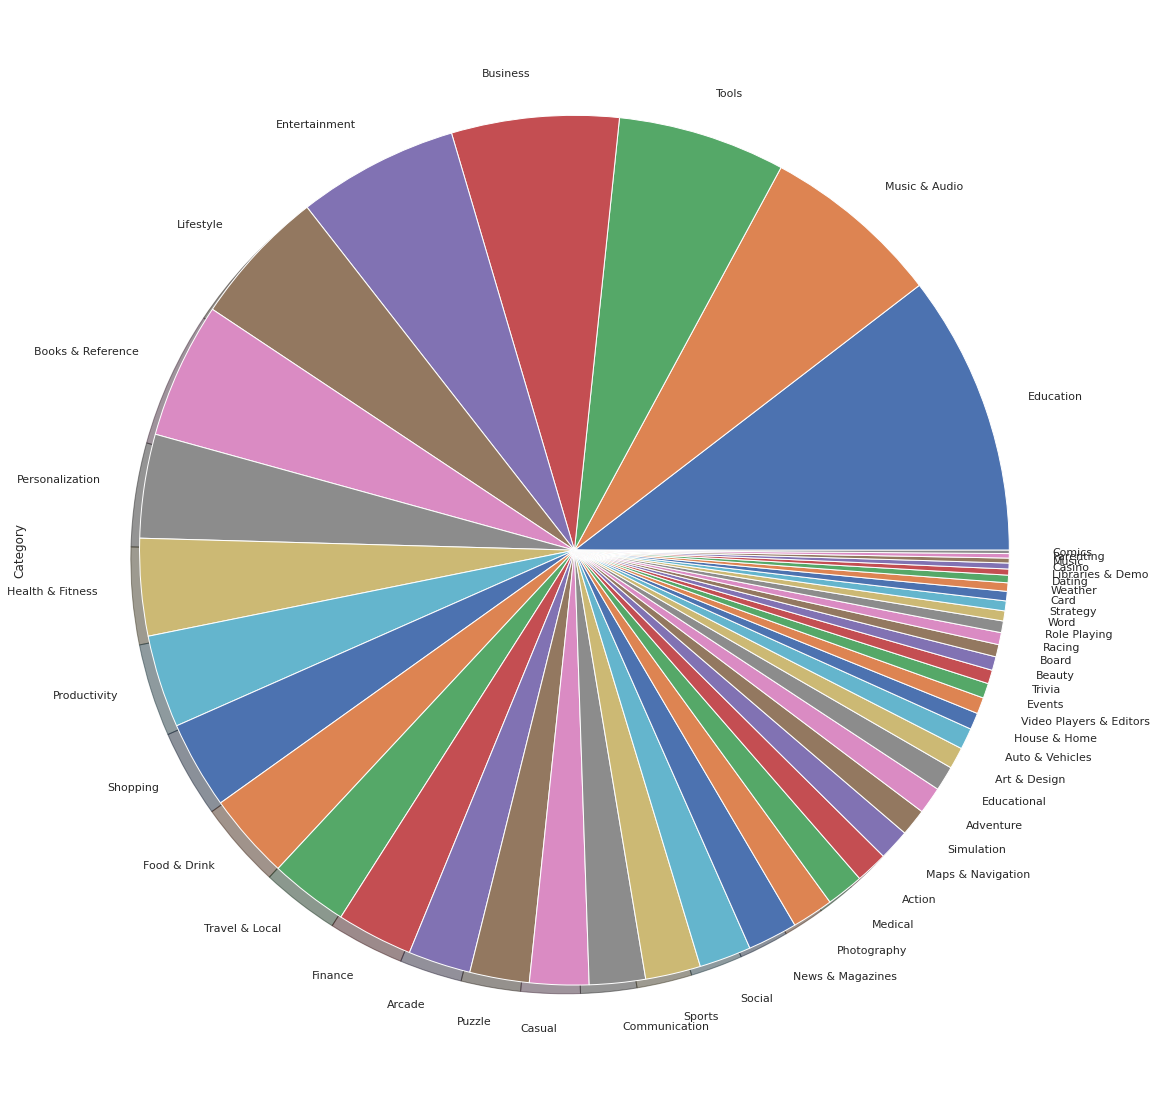

In [ ]:
plt.figure(figsize=(20,20))

df.Category.value_counts().plot(kind='pie',shadow = True)

The most famous category is "Tools" and this is because it is the same type of the most downloaded App "Google Play services". While the second famous category  is "Communication". 

## 4- Dataset

Check the features:

In [ ]:
df['Category'].value_counts()

Education                  241090
Music & Audio              154906
Tools                      143988
Business                   143771
Entertainment              138276
Lifestyle                  118331
Books & Reference          116728
Personalization             89210
Health & Fitness            83510
Productivity                79698
Shopping                    75256
Food & Drink                73927
Travel & Local              67288
Finance                     65466
Arcade                      53792
Puzzle                      51168
Casual                      50813
Communication               48167
Sports                      47483
Social                      44734
News & Magazines            42807
Photography                 35552
Medical                     32065
Action                      27555
Maps & Navigation           26722
Simulation                  23282
Adventure                   23203
Educational                 21308
Art & Design                18539
Auto & Vehicle

In [ ]:
df["Editors Choice"].value_counts()

False    2312091
True         853
Name: Editors Choice, dtype: int64

In [ ]:
df["Free"].value_counts()

True     2267876
False      45068
Name: Free, dtype: int64

In [ ]:
df["Content Rating"].value_counts()

Everyone           2022089
Teen                196375
Mature 17+           60289
Everyone 10+         33901
Unrated                154
Adults only 18+        136
Name: Content Rating, dtype: int64

Factorizing some important featutes from string to int

In [ ]:
df['Content Rating'] = pd.factorize(df['Content Rating'])[0].astype(int)
df['Category'] = pd.factorize(df['Category'])[0].astype(int)

df["Editors Choice"]=df["Editors Choice"].replace({True:1,False:0})
df["Ad Supported"]=df["Ad Supported"].replace({True:1,False:0})
df["In App Purchases"]=df["In App Purchases"].replace({True:1,False:0})
df["Free"]=df["Free"].replace({True:1,False:0})

The features after the factorization:

In [ ]:
df["Content Rating"].value_counts()

0    2022089
1     196375
2      60289
3      33901
5        154
4        136
Name: Content Rating, dtype: int64

In [ ]:
df["Free"].value_counts()

1    2267876
0      45068
Name: Free, dtype: int64

In [ ]:
df["Editors Choice"].value_counts()

0    2312091
1        853
Name: Editors Choice, dtype: int64

Saving the "Installs" labels into variable to use in the visualization:

In [ ]:
InstallsLabels=pd.factorize(df['Installs'])[1].astype(str)
InstallsLabels

Index(['Too Low Installed', 'Low Installed', 'Medium Installed',
       'Highly Installed', 'Too Highly Installed'],
      dtype='object')

Handling the missing values in "Installs" column, by inserting "Too Low Installed" in the NA.

In [ ]:
df['Installs'].fillna("Too Low Installed", inplace=True)


In [ ]:
df['Installs'] = pd.factorize(df['Installs'])[0].astype(int)


In [ ]:
df['Installs'].value_counts()

0    1652055
1     585932
2      60662
3      14160
4        135
Name: Installs, dtype: int64

caculate and represent the correlation between variable in the dataset:

In [ ]:
df.corr()

,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Content Rating,Ad Supported,In App Purchases,Editors Choice
Category,1.000000,0.018742,0.003900,0.040678,-0.001942,-0.001964,0.020496,-0.004782,0.079034,0.064494,0.097120,0.015637
Rating,0.018742,1.000000,0.013038,0.467510,0.011214,0.012615,-0.010756,-0.003674,0.039534,0.160502,0.153820,0.019485
Rating Count,0.003900,0.013038,1.000000,0.064842,0.545281,0.547571,0.001410,-0.000411,0.010311,0.005294,0.025737,0.137311
Installs,0.040678,0.467510,0.064842,1.000000,0.062591,0.068672,0.036011,-0.013347,0.075573,0.212434,0.251877,0.076446
Minimum Installs,-0.001942,0.011214,0.545281,0.062591,1.000000,0.954037,0.001623,-0.000461,0.004222,0.002250,0.014179,0.059932
Maximum Installs,-0.001964,0.012615,0.547571,0.068672,0.954037,1.000000,0.001815,-0.000515,0.005078,0.002882,0.016101,0.064206
Free,0.020496,-0.010756,0.001410,0.036011,0.001623,0.001815,1.000000,-0.278831,-0.001206,0.123617,0.008669,-0.003157
Price,-0.004782,-0.003674,-0.000411,-0.013347,-0.000461,-0.000515,-0.278831,1.000000,0.000311,-0.034276,-0.002634,0.000503
Content Rating,0.079034,0.039534,0.010311,0.075573,0.004222,0.005078,-0.001206,0.000311,1.000000,0.117973,0.092204,0.018380
Ad Supported,0.064494,0.160502,0.005294,0.212434,0.002250,0.002882,0.123617,-0.034276,0.117973,1.000000,0.138312,0.005702


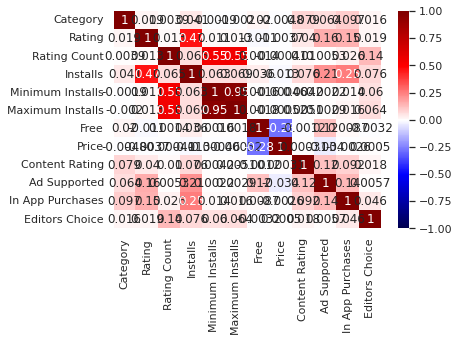

In [ ]:
sns.heatmap(df.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);

### create two diffrent dataset for the modeling

drop the unneeded columns:

In [ ]:
df_draft=df.drop(['Currency','Minimum Android','Last Updated','Privacy Policy','Scraped Time','Developer Website'],1)
df_draft

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Size,Developer Id,Developer Email,Released,Content Rating,Ad Supported,In App Purchases,Editors Choice
0,Gakondo,com.ishakwe.gakondo,0,0.0,0.0,0,10.0,15,1,0.0,10M,Jean Confident Irénée NIYIZIBYOSE,jean21101999@gmail.com,"Feb 26, 2020",0,0,0,0
1,Ampere Battery Info,com.webserveis.batteryinfo,1,4.4,64.0,1,5000.0,7662,1,0.0,2.9M,Webserveis,webserveis@gmail.com,"May 21, 2020",0,1,0,0
2,Vibook,com.doantiepvien.crm,2,0.0,0.0,0,50.0,58,1,0.0,3.7M,Cabin Crew,vnacrewit@gmail.com,"Aug 9, 2019",0,0,0,0
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,3,5.0,5.0,0,10.0,19,1,0.0,1.8M,Climate Smart Tech2,climatesmarttech2@gmail.com,"Sep 10, 2018",0,1,0,0
4,GROW.me,com.horodyski.grower,1,0.0,0.0,0,100.0,478,1,0.0,6.2M,Rafal Milek-Horodyski,rmilekhorodyski@gmail.com,"Feb 21, 2020",0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2312939,大俠客—熱血歸來,com.rxsj.ssjj,44,4.3,16775.0,1,100000.0,337109,1,0.0,77M,ALICE GAME,ssjjcomhk@gmail.com,NaN,1,0,0,0
2312940,ORU Online,com.threedream.oruonline,20,0.0,0.0,0,100.0,430,1,0.0,44M,"3Dream Studios, LLC",3DreamDeveloper@gmail.com,"Jan 17, 2018",0,0,0,0
2312941,Data Structure,datastructure.appoworld.datastucture,20,0.0,0.0,0,100.0,202,1,0.0,29M,appoworld,appoworld.official@gmail.com,"Aug 19, 2018",0,0,0,0
2312942,Devi Suktam,ishan.devi.suktam,23,3.5,8.0,0,1000.0,2635,1,0.0,10M,Bhakti,ruchisono@gmail.com,"Aug 1, 2016",0,1,0,0


In [ ]:
df_draft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312944 entries, 0 to 2312943
Data columns (total 18 columns):
 #   Column            Dtype  
---  ------            -----  
 0   App Name          object 
 1   App Id            object 
 2   Category          int64  
 3   Rating            float64
 4   Rating Count      float64
 5   Installs          int64  
 6   Minimum Installs  float64
 7   Maximum Installs  int64  
 8   Free              int64  
 9   Price             float64
 10  Size              object 
 11  Developer Id      object 
 12  Developer Email   object 
 13  Released          object 
 14  Content Rating    int64  
 15  Ad Supported      int64  
 16  In App Purchases  int64  
 17  Editors Choice    int64  
dtypes: float64(4), int64(8), object(6)
memory usage: 317.6+ MB


In [ ]:
df_draft.isna().sum()

App Name                2
App Id                  0
Category                0
Rating              22883
Rating Count        22883
Installs                0
Minimum Installs      107
Maximum Installs        0
Free                    0
Price                   0
Size                  196
Developer Id           33
Developer Email        31
Released            71053
Content Rating          0
Ad Supported            0
In App Purchases        0
Editors Choice          0
dtype: int64

As the number of columns decreased the NA decreased

In [ ]:
df['Price'].value_counts().head(10)

0.00    2268011
0.99      11851
1.99       5817
2.99       3921
1.49       3823
4.99       2496
3.99       2404
2.49       2182
3.49       1272
9.99        878
Name: Price, dtype: int64

Free Apps are the most common

In [ ]:
df['Rating Count'].value_counts()

0.0         1059762
5.0           64288
6.0           54325
7.0           46838
8.0           40585
             ...   
35179.0           1
11272.0           1
35178.0           1
35173.0           1
131071.0          1
Name: Rating Count, Length: 38482, dtype: int64

###### 1- Dataset 1:  by drop the na rows

In [ ]:
df_dropna=df_draft.dropna()
df_dropna.shape

(2241625, 18)

As I have dropped some colmuns, when I dropped NA rows I did not loss to much rows. 

###### 2- Dataset 2: by replacing the missing values

In [ ]:
df_replaceMissing=df_draft
df_replaceMissing.isna().sum()

App Name                2
App Id                  0
Category                0
Rating              22883
Rating Count        22883
Installs                0
Minimum Installs      107
Maximum Installs        0
Free                    0
Price                   0
Size                  196
Developer Id           33
Developer Email        31
Released            71053
Content Rating          0
Ad Supported            0
In App Purchases        0
Editors Choice          0
dtype: int64

I have replaced the NA values in Rating col by the Median of the Rating col:

In [ ]:
Rating_median = df_replaceMissing.Rating.median()
df_replaceMissing.Rating.fillna(Rating_median, inplace=True)

The missing values in 'Installs' and 'Minimum Installs' columns in the same rows. So, I have replaced NA in 'Installs' col by 'Too Low Installed' and in the 'Minimum Installs' by 0, to apear compatible together: 

In [ ]:
df_replaceMissing['Minimum Installs'].fillna(0, inplace=True)

I have replaced NA values in 'Rating Count' col by the median, as I cannot replace them with mean (mean = float), while this col represent number of people who rate the App, so it will be always integer:

In [ ]:
RatingCount_median = df_replaceMissing['Rating Count'].median()
df_replaceMissing['Rating Count'].fillna(RatingCount_median, inplace=True)

The 'App Name' has 2 NA while 'App Id' did not have any NA. So, I have extract the App Name from App Id:

In [ ]:
#in the future  I will use split function
df_replaceMissing['App Name'].fillna(df_replaceMissing['App Id'],inplace=True)

I used split with '.com' instead of '@' as I may have the developer ID in the domain. Also, I have check if there is any NA value in the 'developer email' col where the 'developer id' NaN but alhamdulilah it is not:


In [ ]:
df_replaceMissing['Developer Id'].fillna(((df_replaceMissing['Developer Email'].str.split('.com',1))[0])[0],inplace=True)

Now I can drop 'deveoper Email' col as I used very well:

In [ ]:
df_replaceMissing=df_replaceMissing.drop(['Developer Email'],1)

As the size contains string values I used the mode to replace the NA:

In [ ]:
Size_mode = df_replaceMissing['Size'].mode()
df_replaceMissing['Size'].fillna(Size_mode[0], inplace=True)

I  used split function to extract only the year from the "Released" col:

In [ ]:
## in future I will use this col to build time series data (Scraped Time & Released)
int(((df_replaceMissing['Released'].str.split(',',1))[0])[1].strip())

2020

In [ ]:
#Should I drop this col or keep it as it is or only keep the released year ?
df_replaceMissing['Released'].fillna(int(((df_replaceMissing['Released'].str.split(',',1))[0])[1].strip()),inplace=True)


At the end we have no NA values in df_replaceMissing Alhamdulillah:

In [ ]:
df_replaceMissing.isna().sum()

App Name            0
App Id              0
Category            0
Rating              0
Rating Count        0
Installs            0
Minimum Installs    0
Maximum Installs    0
Free                0
Price               0
Size                0
Developer Id        0
Released            0
Content Rating      0
Ad Supported        0
In App Purchases    0
Editors Choice      0
dtype: int64

## 5- Models

Info about the Two datasets will be used:

In [ ]:
df_dropna.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2241625 entries, 0 to 2312943
Data columns (total 18 columns):
 #   Column            Dtype  
---  ------            -----  
 0   App Name          object 
 1   App Id            object 
 2   Category          int64  
 3   Rating            float64
 4   Rating Count      float64
 5   Installs          int64  
 6   Minimum Installs  float64
 7   Maximum Installs  int64  
 8   Free              int64  
 9   Price             float64
 10  Size              object 
 11  Developer Id      object 
 12  Developer Email   object 
 13  Released          object 
 14  Content Rating    int64  
 15  Ad Supported      int64  
 16  In App Purchases  int64  
 17  Editors Choice    int64  
dtypes: float64(4), int64(8), object(6)
memory usage: 324.9+ MB


In [ ]:
df_replaceMissing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312944 entries, 0 to 2312943
Data columns (total 17 columns):
 #   Column            Dtype  
---  ------            -----  
 0   App Name          object 
 1   App Id            object 
 2   Category          int64  
 3   Rating            float64
 4   Rating Count      float64
 5   Installs          int64  
 6   Minimum Installs  float64
 7   Maximum Installs  int64  
 8   Free              int64  
 9   Price             float64
 10  Size              object 
 11  Developer Id      object 
 12  Released          object 
 13  Content Rating    int64  
 14  Ad Supported      int64  
 15  In App Purchases  int64  
 16  Editors Choice    int64  
dtypes: float64(4), int64(8), object(5)
memory usage: 300.0+ MB


## Classification Models

Creating x_data, y_targe,X_train, X_test, y_train, and y_test sets for the two datasets to use them in the classification models:

In [ ]:
X_replaceMissing = df_replaceMissing.drop(['Installs','Released','App Name','App Id','Size','Developer Id'],1)
Y_replaceMissing = df_replaceMissing[['Installs']]

X_dropna = df_dropna.drop(['Installs','Released','App Name','App Id','Size','Developer Id','Developer Email'],1)
Y_dropna = df_dropna[['Installs']]

In [ ]:
InstallsLabels = ['Too Low Installed', 'Low Installed', 'Medium Installed', 'Highly Installed', 'Too Highly Installed']

X_train_RM, X_test_RM, y_train_RM, y_test_RM = train_test_split(X_replaceMissing, Y_replaceMissing, 
                                                    test_size = 0.2, random_state=42)

X_train_DN, X_test_DN, y_train_DN, y_test_DN = train_test_split(X_dropna, Y_dropna, 
                                                    test_size = 0.2, random_state=42)


### Logistic Regression model

1st dataset: df_replaceMissing: 

In [ ]:
logReg1 = LogisticRegression(C=1000) # setting C very high essentially removes regularization
logReg1.fit(X_train_RM, y_train_RM)
y_pred = logReg1.predict(X_test_RM)

print("Accuracy:",metrics.accuracy_score(y_test_RM, y_pred))
print("Precision:",metrics.precision_score(y_test_RM, y_pred,average='micro'))
print("Recall:",metrics.recall_score(y_test_RM, y_pred,average='micro')) # micro because it is multi class
print("F1 Score:",metrics.f1_score(y_test_RM, y_pred,average='micro'))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Accuracy: 0.009438183787336058
Precision: 0.009438183787336058
Recall: 0.009438183787336058
F1 Score: 0.009438183787336058


2nd dataset: df_dropna: 

In [ ]:
logReg2 = LogisticRegression(C=1000) # setting C very high essentially removes regularization
logReg2.fit(X_train_DN, y_train_DN)
y_pred = logReg2.predict(X_test_DN)

print("Accuracy:",metrics.accuracy_score(y_test_DN, y_pred))
print("Precision:",metrics.precision_score(y_test_DN, y_pred, average='micro'))
print("Recall:",metrics.recall_score(y_test_DN, y_pred, average='micro'))
print("F1 Score:",metrics.f1_score(y_test_DN, y_pred,average='micro'))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Accuracy: 0.009999442368817264
Precision: 0.009999442368817264
Recall: 0.009999442368817264
F1 Score: 0.009999442368817264


### Logistic Regression (Standard Scaler)

1st dataset: df_replaceMissing: 

In [ ]:
std_scale = StandardScaler()
LogReg1_b = LogisticRegression()


X_train_scaled = std_scale.fit_transform(X_train_RM)

LogReg1_b.fit(X_train_scaled, y_train_RM)

y_pred = LogReg1_b.predict(X_test_RM)

print("Accuracy:",metrics.accuracy_score(y_test_RM, y_pred))
print("Precision:",metrics.precision_score(y_test_RM, y_pred,average='micro'))
print("Recall:",metrics.recall_score(y_test_RM, y_pred,average='micro')) # micro because it is multi class
print("F1 Score:",metrics.f1_score(y_test_RM, y_pred,average='micro'))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Accuracy: 0.004788267771174844
Precision: 0.004788267771174844
Recall: 0.004788267771174844
F1 Score: 0.004788267771174844


1nd dataset: df_dropna: 

In [ ]:
std_scale = StandardScaler()
LogReg2_b = LogisticRegression()


X_train_scaled = std_scale.fit_transform(X_train_DN)

LogReg2_b.fit(X_train_scaled, y_train_DN)

y_pred = LogReg2_b.predict(X_test_DN)

print("Accuracy:",metrics.accuracy_score(y_test_DN, y_pred))
print("Precision:",metrics.precision_score(y_test_DN, y_pred,average='micro'))
print("Recall:",metrics.recall_score(y_test_DN, y_pred,average='micro')) # micro because it is multi class
print("F1 Score:",metrics.f1_score(y_test_DN, y_pred,average='micro'))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Accuracy: 0.004661796687670775
Precision: 0.004661796687670775
Recall: 0.004661796687670775
F1 Score: 0.004661796687670775


### Decision Tree Classifier

1st dataset: df_replaceMissing:

In [ ]:
decisiontree1 = DecisionTreeClassifier(max_depth=4)

decisiontree1.fit(X_train_RM, y_train_RM)
y_pred = decisiontree1.predict(X_test_RM)

print("Accuracy:",metrics.accuracy_score(y_test_RM, y_pred))
print("Precision:",metrics.precision_score(y_test_RM, y_pred,average='micro'))
print("Recall:",metrics.recall_score(y_test_RM, y_pred,average='micro')) # micro because it is multi class
print("F1 Score:",metrics.f1_score(y_test_RM, y_pred,average='micro'))

Accuracy: 0.9999978382538279
Precision: 0.9999978382538279
Recall: 0.9999978382538279
F1 Score: 0.9999978382538279


2nd dataset: df_dropna:

In [ ]:
decisiontree2 = DecisionTreeClassifier(max_depth=4)

decisiontree2.fit(X_train_DN, y_train_DN)
y_pred = decisiontree2.predict(X_test_DN)

print("Accuracy:",metrics.accuracy_score(y_test_DN, y_pred))
print("Precision:",metrics.precision_score(y_test_DN, y_pred,average='micro'))
print("Recall:",metrics.recall_score(y_test_DN, y_pred,average='micro')) # micro because it is multi class
print("F1 Score:",metrics.f1_score(y_test_DN, y_pred,average='micro'))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


### Random Forest Classifier

1st dataset: df_replaceMissing:

In [ ]:
randomforest1 = RandomForestClassifier(n_estimators=100)

randomforest1.fit(X_train_RM, y_train_RM)
y_pred = randomforest1.predict(X_test_RM)

print("Accuracy:",metrics.accuracy_score(y_test_RM, y_pred))
print("Precision:",metrics.precision_score(y_test_RM, y_pred,average='micro'))
print("Recall:",metrics.recall_score(y_test_RM, y_pred,average='micro')) # micro because it is multi class
print("F1 Score:",metrics.f1_score(y_test_RM, y_pred,average='micro'))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


2nd dataset: df_dropna:

In [ ]:
randomforest2 = RandomForestClassifier(n_estimators=100)

randomforest2.fit(X_train_DN, y_train_DN)
y_pred = randomforest2.predict(X_test_DN)

print("Accuracy:",metrics.accuracy_score(y_test_DN, y_pred))
print("Precision:",metrics.precision_score(y_test_DN, y_pred,average='micro'))
print("Recall:",metrics.recall_score(y_test_DN, y_pred,average='micro')) # micro because it is multi class
print("F1 Score:",metrics.f1_score(y_test_DN, y_pred,average='micro'))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


###  KFold

2nd dataset: df_dropna:

In [ ]:

# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
models = [logReg2 , LogReg2_b ,decisiontree2, randomforest2 ]



for x in models:
  print("Model Name: ",x)
  # evaluate model
  scores = cross_val_score(x, X_dropna, Y_dropna, scoring='accuracy', cv=cv, n_jobs=-1)
  # report performance
  print('Accuracy: %.3f ' % (mean(scores)))

Model Name:  LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Accuracy: 0.010 
Model Name:  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Accuracy: 0.010 
Model Name:  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_s

### Additional work in the classification 

In [ ]:
############# DONE
from sklearn.metrics import classification_report

LogReg = LogisticRegression()

LogReg.fit(X_train_RM,y_train_RM)

y_pred = LogReg.predict(X_test_RM)

print(classification_report(y_test_RM,y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


              precision    recall  f1-score   support

           0       1.00      0.01      0.01    330350
           1       0.00      0.00      0.00    117187
           2       0.01      0.01      0.01     12172
           3       0.01      0.73      0.02      2851
           4       0.00      0.59      0.00        29

    accuracy                           0.01    462589
   macro avg       0.20      0.27      0.01    462589
weighted avg       0.71      0.01      0.01    462589



[]

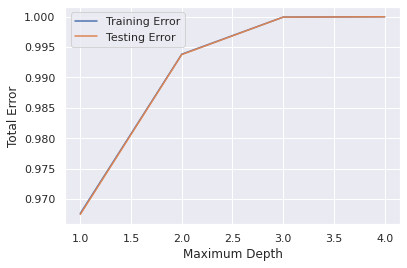

In [ ]:
 from sklearn.metrics import accuracy_score
max_depth_list = [1,2,3,4]

train_errors = [] # Log training errors for each model
test_errors = [] # Log testing errors for each model

for x in max_depth_list:
    dtc = DecisionTreeClassifier(max_depth=x) 
    dtc.fit(X_train_RM,y_train_RM)
    train_z = dtc.predict(X_train_RM)
    test_z = dtc.predict(X_test_RM)
    train_errors.append(accuracy_score(y_train_RM, train_z))
    test_errors.append(accuracy_score(y_test_RM, test_z))

x = np.arange(len(max_depth_list)) + 1 # Create domain for plot
plt.plot(x, train_errors, label='Training Error') # Plot training error over domain
plt.plot(x, test_errors, label='Testing Error') # Plot testing error over domain
plt.xlabel('Maximum Depth') # Label x-axis
plt.ylabel('Total Error') # Label y-axis
plt.legend() # Show plot labels as legend
plt.plot() # Show graph

In [ ]:
#features importance
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train_RM,y_train_RM)
rf.feature_importances_
plt.barh(df_replaceMissing.feature_names, rf.feature_importances_)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


array([0.        , 0.        , 0.        , 0.93465151, 0.06534849,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        ])

[Text(95.65714285714286, 195.696, 'X[3] <= 3000.0\ngini = 0.425\nsamples = 1793300\nvalue = [1279851, 455510, 46986, 10858, 95]'),
 Text(47.82857142857143, 152.208, 'gini = 0.0\nsamples = 1279851\nvalue = [1279851, 0, 0, 0, 0]'),
 Text(143.4857142857143, 152.208, 'X[4] <= 499987.0\ngini = 0.204\nsamples = 513449\nvalue = [0, 455510, 46986, 10858, 95]'),
 Text(95.65714285714286, 108.72, 'gini = 0.0\nsamples = 455510\nvalue = [0, 455510, 0, 0, 0]'),
 Text(191.31428571428572, 108.72, 'X[3] <= 3000000.0\ngini = 0.307\nsamples = 57939\nvalue = [0, 0, 46986, 10858, 95]'),
 Text(143.4857142857143, 65.232, 'gini = 0.0\nsamples = 46986\nvalue = [0, 0, 46986, 0, 0]'),
 Text(239.14285714285714, 65.232, 'X[3] <= 300000000.0\ngini = 0.017\nsamples = 10953\nvalue = [0, 0, 0, 10858, 95]'),
 Text(191.31428571428572, 21.744, 'gini = 0.0\nsamples = 10858\nvalue = [0, 0, 0, 10858, 0]'),
 Text(286.9714285714286, 21.744, 'gini = 0.0\nsamples = 95\nvalue = [0, 0, 0, 0, 95]')]

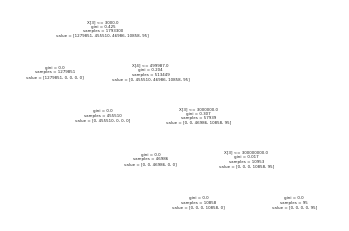

In [ ]:
from sklearn import tree
tree.plot_tree(decisiontree2)


In [ ]:
from sklearn.model_selection import cross_val_score

dtree = DecisionTreeClassifier()

print(cross_val_score(dtree, X_replaceMissing, Y_replaceMissing, scoring="accuracy", cv = 7))
mean_score = cross_val_score(dtree, X_replaceMissing, Y_replaceMissing, scoring="accuracy", cv = 7).mean()
std_score = cross_val_score(dtree, X_replaceMissing, Y_replaceMissing, scoring="accuracy", cv = 7).std()
print(mean_score)
print(std_score)

[1. 1. 1. 1. 1. 1. 1.]
0.9999991353009704
1.367209212065987e-06


## Regression Models


Creating x_data, y_targe,X_train, X_test, y_train, and y_test sets for the two datasets to use them in the regression models:

In [ ]:
X_replaceMissing_reg = df_replaceMissing.drop(['Rating','Released','App Name','App Id','Size','Developer Id'],1)
Y_replaceMissing_reg = df_replaceMissing[['Rating']]

X_dropna_reg = df_dropna.drop(['Rating','Released','App Name','App Id','Size','Developer Id','Developer Email'],1)
Y_dropna_reg = df_dropna[['Rating']]

In [ ]:

X_train_RM_reg, X_test_RM_reg, y_train_RM_reg, y_test_RM_reg = train_test_split(X_replaceMissing_reg, Y_replaceMissing_reg, 
                                                    test_size = 0.2, random_state=42)

X_train_DN_reg, X_test_DN_reg, y_train_DN_reg, y_test_DN_reg = train_test_split(X_dropna_reg, Y_dropna_reg, 
                                                    test_size = 0.2, random_state=42)

## Linear Regression

1st dataset: df_replaceMissing

In [ ]:
linReg1 = LinearRegression()
linReg1.fit(X_train_RM_reg, y_train_RM_reg)
# Predicting the Test set results
y_pred = linReg1.predict(X_test_RM_reg)
print("Score= ",linReg1.score(X_test_RM_reg, y_pred))
print("RMSE", mean_squared_error(y_test_RM_reg, y_pred, squared=False))


Score=  1.0
RMSE 1.847596128817716


2nd dataset: df_dropna

In [ ]:
linReg = LinearRegression()

linReg.fit(X_train_DN_reg, y_train_DN_reg)
y_pred = linReg.predict(X_test_DN_reg)

print("Accuracy:",linReg.score(X_test_DN_reg, y_pred))
print("RMSE", mean_squared_error(y_test_DN_reg, y_pred, squared=False))



Accuracy: 1.0
RMSE 1.8561957442273433


## Linear Regression (Standard Scaler) 

1st dataset: df_replaceMissing

In [ ]:
linReg1_b = LinearRegression()
std_scale = StandardScaler()
X_train_scaled = std_scale.fit_transform(X_train_RM_reg)

linReg1_b.fit(X_train_scaled, y_train_RM_reg)

# Predicting the Test set results
y_pred = linReg1_b.predict(X_test_RM_reg)

print("Score= ",linReg1_b.score(X_test_RM_reg, y_pred))
print("RMSE", mean_squared_error(y_test_RM_reg, y_pred, squared=False))


Score=  1.0
RMSE 1057041.5682605468


2nd dataset: df_dropna

In [ ]:
linReg2_b = LinearRegression()

X_train_scaled = std_scale.fit_transform(X_train_DN_reg)

linReg2_b.fit(X_train_scaled, y_train_DN_reg)

# Predicting the Test set results
y_pred = linReg2_b.predict(X_test_DN_reg)

print("Score= ",linReg2_b.score(X_test_DN_reg, y_pred))
print("RMSE", mean_squared_error(y_test_DN_reg, y_pred, squared=False))



Score=  1.0
RMSE 507969.0136652463


## Decision Tree Regressor

1st dataset: df_replaceMissing

In [ ]:

DT_reg1 = DecisionTreeRegressor(max_depth=2)
DT_reg1.fit(X_train_RM_reg, y_train_RM_reg)
# Predicting the Test set results
y_pred = DT_reg1.predict(X_test_RM_reg)
print("Score= ",DT_reg1.score(X_test_RM_reg, y_pred))

print("RMSE", mean_squared_error(y_test_RM_reg, y_pred, squared=False))

Score=  1.0
RMSE 0.502205546902695


2nd dataset: df_dropna

In [ ]:
DT_reg2 = DecisionTreeRegressor(max_depth=2)
DT_reg2.fit(X_train_DN_reg, y_train_DN_reg)
# Predicting the Test set results
y_pred = DT_reg2.predict(X_test_DN_reg)
print("Score= ",DT_reg2.score(X_test_DN_reg, y_pred))
print("RMSE", mean_squared_error(y_test_DN_reg, y_pred, squared=False))

Score=  1.0
RMSE 0.47945219254768967


## Random Forest Regressor 

1st dataset: df_replaceMissing

In [ ]:

RF_reg1=RandomForestRegressor(n_estimators=100)  #max_depth=2, random_state=0
RF_reg1.fit(X_train_RM_reg, y_train_RM_reg)
# Predicting the Test set results
y_pred = RF_reg1.predict(X_test_RM_reg)
print("Score= ",RF_reg1.score(X_test_RM_reg, y_pred))
print("RMSE", mean_squared_error(y_test_RM_reg, y_pred, squared=False))


2nd dataset: df_dropna

In [ ]:
RF_reg2=RandomForestRegressor(n_estimators=100)  #max_depth=2, random_state=0
RF_reg2.fit(X_train_DN_reg, y_train_DN_reg)
# Predicting the Test set results
y_pred = RF_reg2.predict(X_test_DN_reg)
print("Score= ",RF_reg2.score(X_test_DN_reg, y_pred))
print("RMSE", mean_squared_error(y_test_DN_reg, y_pred, squared=False))


## Future Work

In [ ]:
# Train on training set, and Test on testing set
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

<ipython-input-62-c7be7e45ec3c>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train, y_train)


In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

gnb.fit(X_train_DN_reg, y_train_DN_reg)
# Predicting the Test set results
y_pred = gnb.predict(X_test_DN_reg)
print("Score= ",gnb.score(X_test_DN_reg, y_pred))

In [ ]:
import tensorflow as tf

deep_model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=10, input_shape=(2, ), name="hidden_layer"),
    tf.keras.layers.Activation("tanh", name="hidden_activation"),
    tf.keras.layers.Dense(units=1, name="output_layer"),
    tf.keras.layers.Activation("sigmoid", name="sigmoid_activation"),
])



In [ ]:
deep_model.compile(optimizer="nadam", loss="binary_crossentropy", metrics=["acc"])



In [ ]:
deep_model.fit(x=df_dropna.drop(['Installs','Released','App Name','App Id','Size','Developer Id','Developer Email'],1), y= df_dropna['Installs'], epochs=20)


In [ ]:
X = df_dropna.drop(['Rating','Released','App Name','App Id','Size','Developer Id','Developer Email'],1)
X = pd.get_dummies(X, columns=['Installs'],prefix="Installs",prefix_sep=": ",drop_first=True)
y = df_dropna[['Rating']]
#
# Create training and test split
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1, stratify=y)
#
# Create the pipeline
#
pipeline = make_pipeline(StandardScaler(),
RandomForestRegressor(n_estimators=10, max_features=5, max_depth=2, random_state=1))
#
# Fit the Pipeline estimator
#
pipeline.fit(X_train, y_train)